МІНІСТЕРСТВО ОСВІТИ І НАУКИ, МОЛОДІ ТА СПОРТУ УКРАЇНИ
НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
«КИЇВСЬКИЙ ПОЛІТИХНІЧНИЙ ІНСТИТУТ ІМ.ІГОРЯ СІКОРСЬКОГО»
ФІЗИКО-ТЕХНІЧНИЙ ІНСТИТУТ


Лабораторна робота №2
«Геометричні перетворення координат у просторі»
Варіант 9





Виконав:                                                                     Студент 2 курсу
     Групи ФІ-21
Климентьєв Максим




Київ 2024

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
%matplotlib widget
import numpy as np
import copy

# ЗАВДАННЯ ДО ЛАБОРАТОРНОЇ РОБОТИ

1. Ознайомитись з теоретичними відомостями до лабораторної роботи. Дослідити кожне перетворення (перетворення, масштабування, поворот, відображення тощо) та їхні комбінації просторі. Ознайомитись з матеріалом, який віднситься до проектування об’єктів на площину.

In [46]:
class Line:
    def __init__(self, point:list[float, float, float], vector:list[float, float, float]):
        self.point = np.array(point)
        self.vector = np.array(vector)
        
        self.vector = self.vector / np.linalg.norm(self.vector)
        self.vector_4d = np.append(self.vector, 1)
        
        self.original = np.array([self.point + t * self.vector for t in np.linspace(-8, 8, 100)])
        self.original = np.column_stack((self.original, np.array([[1]*self.original.shape[0]])))
        
        l, m, n = self.vector[0], self.vector[1], self.vector[2]
        a, b, c = self.point[0], self.point[1], self.point[2]
        
        self.move_matrix = np.matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [-a, -b, -c, 1]
        ])
        self.move_back_matrix = np.matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [a, b, c, 1]
        ])
        
        cos_psi, sin_psi = n/np.sqrt(l**2+n**2), l/np.sqrt(l**2+n**2)
        
        self.matrix_x = np.matrix([
            [cos_psi, 0, sin_psi, 0,],
            [0, 1, 0, 0],
            [-sin_psi, 0, cos_psi, 0],
            [0, 0, 0, 1]
        ])
        self.matrix_back_x = self.matrix_x.T
        
        self.new_vector = self.vector_4d * self.matrix_back_x
        self.new_vector = np.array(self.new_vector)
        l, d = self.new_vector[0][1], self.new_vector[0][2]
        
        self.matrix_y = np.matrix([
            [1, 0, 0, 0,],
            [0, l, d, 0],
            [0, -d, l, 0],
            [0, 0, 0, 1]
        ])
        self.matrix_back_y = self.matrix_y.T
        
        phi = 2*np.pi
        cos_phi = np.cos(phi)
        sin_phi = np.sin(phi)
        self.matrix_z = np.matrix([
            [cos_phi, 0, sin_phi, 0],
            [0, 1, 0, 0],
            [-sin_phi, 0, cos_phi, 0],
            [0, 0, 0, 1]
        ])    
        self.matrix_back_z = self.matrix_z.T
        
    def apply_matrix(self, matrixs):
        if type(matrixs) == list:
            for matrix in matrixs:
                self.original = self.original * matrix
        else:
            self.original = self.original * matrixs

    def copy(self):
        self.old_original = self.original.copy()
        return copy.deepcopy(self)
    
    
class Cube:
    def __init__(self, starting_point:list[float, float, float], cube_edge_len:float):
        # Задаємо координати вершин куба
        close_right_down = [starting_point[0], starting_point[1], starting_point[2]] #  [2, 2, -2]
        far_right_down = [starting_point[0] + cube_edge_len, starting_point[1], starting_point[2]] # [4, 2, -2]
        close_right_up = [starting_point[0], starting_point[1], starting_point[2] + cube_edge_len] # [2, 2, 0]
        far_right_up = [starting_point[0] + cube_edge_len, starting_point[1], starting_point[2] + cube_edge_len] # [4, 2, 0]
        close_left_down = [starting_point[0], starting_point[1] + cube_edge_len, starting_point[2]] # [2, 4, -2]
        far_left_down = [starting_point[0] + cube_edge_len, starting_point[1] + cube_edge_len, starting_point[2]] # [4, 4, -2]
        close_left_up = [starting_point[0], starting_point[1] + cube_edge_len, starting_point[2] + cube_edge_len] # [2, 4, 0]
        far_left_up = [starting_point[0] + cube_edge_len, starting_point[1] + cube_edge_len, starting_point[2] + cube_edge_len] # [4, 4, 0]
        
        self.array = np.array([
            close_right_down, #0
            close_right_up, #1
            close_left_up, #2
            close_left_down, #3
            far_right_down, #4
            far_right_up, #5
            far_left_up, #6
            far_left_down]) #7
        
        self.array_4d = np.column_stack((self.array, np.array([1]*self.array.shape[0])))
        # print(self.array_4d)
        
        self.system_coordinates = np.array([
            [[-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[0])+abs(+cube_edge_len)>=10], 0, 0],
            [[10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[0])+abs(+cube_edge_len)>=10], 0, 0],
            [0, [-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[1])+abs(+cube_edge_len)>=10], 0],
            [0, [10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[1])+abs(+cube_edge_len)>=10], 0],
            [0, 0, [-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[2])+abs(+cube_edge_len)>=10]],
            [0, 0, [10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[2])+abs(+cube_edge_len)>=10]]])

    def create_faces(self):
        # # Initialize a list of vertex coordinates for each face
        # self.faces = np.array([
        #     [self.array_4d[0, :3], self.array_4d[1, :3], self.array_4d[2, :3], self.array_4d[3, :3], self.array_4d[0, :3]],
        #     [self.array_4d[4, :3], self.array_4d[5, :3], self.array_4d[6, :3], self.array_4d[7, :3], self.array_4d[4, :3]],
        #     [self.array_4d[0, :3], self.array_4d[1, :3], self.array_4d[5, :3], self.array_4d[4, :3], self.array_4d[0, :3]],
        #     [self.array_4d[2, :3], self.array_4d[3, :3], self.array_4d[7, :3], self.array_4d[6, :3], self.array_4d[2, :3]],
        #     [self.array_4d[5, :3], self.array_4d[6, :3], self.array_4d[2, :3], self.array_4d[1, :3], self.array_4d[5, :3]],
        #     [self.array_4d[4, :3], self.array_4d[7, :3], self.array_4d[3, :3], self.array_4d[0, :3], self.array_4d[4, :3]]
        # ])
        # Initialize a list of vertex coordinates for each face
        self.faces = [np.zeros([5,3])]*6
        # right face
        self.faces[0] = np.array([
            self.array[0], 
            self.array[1], 
            self.array[2], 
            self.array[3], 
            self.array[0], 
        ])
        # left face
        self.faces[1] = np.array([
            self.array[4],
            self.array[5],
            self.array[6],
            self.array[7],
            self.array[4],
        ])
        # back Face
        self.faces[2] = np.array([
            self.array[0],
            self.array[1],
            self.array[5],
            self.array[4],
            self.array[0],
        ])
        # front Face
        self.faces[3] = np.array([
            self.array[2],
            self.array[3],
            self.array[7],
            self.array[6],
            self.array[2],
        ])
        # top face
        self.faces[4] = np.array([
            self.array[5],
            self.array[6],
            self.array[2],
            self.array[1],
            self.array[5],
        ])
        # bottom face
        self.faces[5] = np.array([
            self.array[4],
            self.array[7],
            self.array[3],
            self.array[0],
            self.array[4],
        ])
        
    def plot3d(self, show_standart=False, line:Line=None):
        self.create_faces()
        # print(self.faces)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(self.array_4d[:, 0], self.array_4d[:, 1], self.array_4d[:, 2])
        ax.plot(self.system_coordinates[:, 0][:2], self.system_coordinates[:, 1][:2], self.system_coordinates[:, 2][:2])
        ax.plot(self.system_coordinates[:, 0][2:4], self.system_coordinates[:, 1][2:4], self.system_coordinates[:, 2][2:4])
        ax.plot(self.system_coordinates[:, 0][4:6], self.system_coordinates[:, 1][4:6], self.system_coordinates[:, 2][4:6])
        
        # print(line.original)
        
        if line != None:
            ax.plot(line.original[:, 0], line.original[:, 1], line.original[:, 2])
            # ax.add_collection3d(Line3DCollection([], linewidths=1))
        
        # plotting cube
        ax.add_collection3d(Poly3DCollection(self.faces, facecolors='cyan', linewidths=1, edgecolors='k', alpha=.25))
        if show_standart:
            ax.add_collection3d(Poly3DCollection(self.old_faces, facecolors='red', linewidths=1, edgecolors='k', alpha=.25))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.set_zlim([-10, 10])
        
        plt.show()
    
    def apply_matrix(self, matrixs):
        if type(matrixs) == list:
            for matrix in matrixs:
                self.array_4d = self.array_4d * matrix
        else:
            self.array_4d = self.array_4d * matrixs
            
    def copy(self):
        try:
            self.old_faces = self.faces.copy()
        except AttributeError:
            self.create_faces()
            self.old_faces = self.faces.copy()
        return copy.deepcopy(self)

In [47]:
# cube = Cube([0,0,0], 2)
# line = Line([1, 2, 3], [2, 1, 3])
# cube_rotate = cube.copy()
# line_rotate = line.copy()
# lst_of_all_needed_matrix = [line.move_matrix, 
#                           line.matrix_x, 
#                           line.matrix_y, 
#                           line.matrix_z, 
#                           line.matrix_back_y, 
#                           line.matrix_back_x, 
#                           line.move_back_matrix]
# for matrix in lst_of_all_needed_matrix:
#     cube_rotate.apply_matrix(matrix)
#     cube_rotate.plot3d(True, line_rotate)

In [48]:
class Line:
    def __init__(self, point:list[float, float, float], vector:list[float, float, float]):
        self.point = np.array(point)
        self.vector = np.array(vector)
        
        self.vector = self.vector / np.linalg.norm(self.vector)
        
        self.vector_4d = np.array(vector + [1])
        
        self.x = np.linspace(-5, 5)
        self.kx = (self.x - self.point[0])/self.vector[0] # self.x/self.vector[0] - self.point[0]/self.vector[0] 
        self.ky = self.vector[1]*self.kx + self.point[1]
        self.kz = self.vector[2]*self.kx + self.point[2]

    # def update_data(self):
    #     print(self.point, self.vector, self.vector[0], self.vector[0][1])
    #     self.vector = self.vector[0]
    #     self.kx = (self.x - self.point[0])/self.vector[0] # self.x/self.vector[0] - self.point[0]/self.vector[0] 
    #     self.ky = self.vector[1]*self.kx + self.point[1]
    #     self.kz = self.vector[2]*self.kx + self.point[2]
    
    def find_all_matrix(self):
        # Move
        self.move_matrix = np.matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [-self.point[0], -self.point[1], -self.point[2], 1],
        ])
        
        self.move_back_matrix = np.matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [self.point[0], self.point[1], self.point[2], 1],
        ])
        
        # R_x
        self.cos_ksi =  self.vector[2]/np.sqrt(self.vector[0]**2 + self.vector[2]**2)
        self.sin_ksi =  self.vector[0]/np.sqrt(self.vector[0]**2 + self.vector[2]**2)
        # self.matrix_x = np.matrix([
        #     [1, 0, 0, 0],
        #     [0, self.cos_ksi, self.sin_ksi, 0],
        #     [0, -self.sin_ksi, self.cos_ksi, 0],
        #     [0, 0, 0, 1],
        # ])
        # self.back_matrix_x = np.matrix([
        #     [1, 0, 0, 0],
        #     [0, self.cos_ksi, -self.sin_ksi, 0],
        #     [0, self.sin_ksi, self.cos_ksi, 0],
        #     [0, 0, 0, 1],
        # ])        
        self.matrix_x = np.matrix([
            [1, 0, 0, 0],
            [0, self.cos_ksi, self.sin_ksi, 0],
            [0, -self.sin_ksi, self.cos_ksi, 0],
            [0, 0, 0, 1],
        ])
        self.back_matrix_x = self.matrix_x.T
        
        
        # R_y
        self.new_vector = self.vector_4d * self.matrix_x
        # print(self.new_vector)
        self.cos_theta = self.new_vector[0, 2]
        self.sin_theta = self.new_vector[0, 0]
        
        # self.cos_theta = self.vector[1]/np.sqrt(self.vector[0]**2 + self.vector[1]**2)
        # self.sin_theta = self.vector[0]/np.sqrt(self.vector[0]**2 + self.vector[1]**2)
        
        # self.matrix_y = np.matrix([
        #     [self.cos_theta, 0, self.sin_theta, 0],
        #     [0, 1, 0, 0],
        #     [-self.sin_theta, 0, self.cos_theta, 0],
        #     [0, 0, 0, 1],
        # ])
        # self.back_matrix_y = np.matrix([
        #     [self.cos_theta, 0, -self.sin_theta, 0],
        #     [0, 1, 0, 0],
        #     [self.sin_theta, 0, self.cos_theta, 0],
        #     [0, 0, 0, 1],
        # ])
        self.matrix_y = np.matrix([
            [self.cos_theta, 0, self.sin_theta, 0],
            [0, 1, 0, 0],
            [-self.sin_theta, 0, self.cos_theta, 0],
            [0, 0, 0, 1],
        ])
        self.back_matrix_y = self.matrix_y.T
        
    def phi(self, phi):
        # R_z
        # self.k = self.vector[1]/self.vector[0]
        # self.b = - self.point[0]/self.vector[0] + self.point[1]
        # self.phi = np.arctan(self.k)
        
        self.phi = phi
        
        self.cos_phi = np.cos(self.phi)
        self.sin_phi = np.sin(self.phi)
        # self.matrix_z = np.matrix([
        #     [self.cos_phi, self.sin_phi, 0, 0],
        #     [-self.sin_phi, self.cos_phi, 0, 0],
        #     [0, 0, 1, 0],
        #     [0, 0, 0, 1],
        # ])
        # self.back_matrix_z = np.matrix([
        #     [self.cos_phi, -self.sin_phi, 0, 0],
        #     [self.sin_phi, self.cos_phi, 0, 0],
        #     [0, 0, 1, 0],
        #     [0, 0, 0, 1],
        # ])
        self.matrix_z = np.matrix([
            [self.cos_phi, self.sin_phi, 0, 0],
            [-self.sin_phi, self.cos_phi, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ])
        self.back_matrix_z = self.matrix_z.T

In [49]:
class Cube:
    def __init__(self, starting_point:list[float, float, float], cube_edge_len:float):
        # Задаємо координати вершин куба
        close_right_down = [starting_point[0], starting_point[1], starting_point[2]] #  [2, 2, -2]
        far_right_down = [starting_point[0] + cube_edge_len, starting_point[1], starting_point[2]] # [4, 2, -2]
        close_right_up = [starting_point[0], starting_point[1], starting_point[2] + cube_edge_len] # [2, 2, 0]
        far_right_up = [starting_point[0] + cube_edge_len, starting_point[1], starting_point[2] + cube_edge_len] # [4, 2, 0]
        close_left_down = [starting_point[0], starting_point[1] + cube_edge_len, starting_point[2]] # [2, 4, -2]
        far_left_down = [starting_point[0] + cube_edge_len, starting_point[1] + cube_edge_len, starting_point[2]] # [4, 4, -2]
        close_left_up = [starting_point[0], starting_point[1] + cube_edge_len, starting_point[2] + cube_edge_len] # [2, 4, 0]
        far_left_up = [starting_point[0] + cube_edge_len, starting_point[1] + cube_edge_len, starting_point[2] + cube_edge_len] # [4, 4, 0]
        
        self.array = np.array([
            close_right_down, #0
            close_right_up, #1
            close_left_up, #2
            close_left_down, #3
            far_right_down, #4
            far_right_up, #5
            far_left_up, #6
            far_left_down]) #7
        
        self.array_4d = np.column_stack((self.array, np.array([1]*self.array.shape[0])))
        
        self.system_coordinates = np.array([
            [[-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[0])+abs(+cube_edge_len)>=10], 0, 0],
            [[10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[0])+abs(+cube_edge_len)>=10], 0, 0],
            [0, [-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[1])+abs(+cube_edge_len)>=10], 0],
            [0, [10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[1])+abs(+cube_edge_len)>=10], 0],
            [0, 0, [-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[2])+abs(+cube_edge_len)>=10]],
            [0, 0, [10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[2])+abs(+cube_edge_len)>=10]]])
    
    def update_array(self):
        self.array = np.array(self.array_4d[:, :3])

    def multiple(self, matrix:np.matrix, show_step=False):
        # print(array)
        # for row_index in range(array.shape[0]):
        #     array[row_index] = array[row_index] * matrix
        self.array_4d = self.array_4d * matrix
        # print(type(self.array), self.array)
        self.update_array()
        # print(type(self.array), self.array)
        # if show_step:
        #     self.line.vector_4d = self.line.vector_4d * matrix
        #     self.line.vector = self.line.vector_4d[:, :3]
        #     self.line.vector = np.array(self.line.vector)
        #     self.line.update_data()
            
        #     self.array = self.array_4d[:, :3]
        #     self.plot3d(True, self.line)
    
    def create_faces(self):
        # Initialize a list of vertex coordinates for each face
        self.faces = [np.zeros([5,3])]*6
        # right face
        self.faces[0] = np.array([
            self.array[0], 
            self.array[1], 
            self.array[2], 
            self.array[3], 
            self.array[0], 
        ])
        # left face
        self.faces[1] = np.array([
            self.array[4],
            self.array[5],
            self.array[6],
            self.array[7],
            self.array[4],
        ])
        # back Face
        self.faces[2] = np.array([
            self.array[0],
            self.array[1],
            self.array[5],
            self.array[4],
            self.array[0],
        ])
        # front Face
        self.faces[3] = np.array([
            self.array[2],
            self.array[3],
            self.array[7],
            self.array[6],
            self.array[2],
        ])
        # top face
        self.faces[4] = np.array([
            self.array[5],
            self.array[6],
            self.array[2],
            self.array[1],
            self.array[5],
        ])
        # bottom face
        self.faces[5] = np.array([
            self.array[4],
            self.array[7],
            self.array[3],
            self.array[0],
            self.array[4],
        ])
    
    def plot3d(self, show_standart=False, line:Line=None):
        self.create_faces()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(self.array[:, 0], self.array[:, 1], self.array[:, 2])
        ax.plot(self.system_coordinates[:, 0][:2], self.system_coordinates[:, 1][:2], self.system_coordinates[:, 2][:2])
        ax.plot(self.system_coordinates[:, 0][2:4], self.system_coordinates[:, 1][2:4], self.system_coordinates[:, 2][2:4])
        ax.plot(self.system_coordinates[:, 0][4:6], self.system_coordinates[:, 1][4:6], self.system_coordinates[:, 2][4:6])
        
        if line != None:
            ax.plot(line.kx, line.ky, line.kz)
        
        # plotting cube
        ax.add_collection3d(Poly3DCollection(self.faces, facecolors='cyan', linewidths=1, edgecolors='k', alpha=.25))
        if show_standart:
            ax.add_collection3d(Poly3DCollection(self.old_faces, facecolors='red', linewidths=1, edgecolors='k', alpha=.25))
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()
    
    # Scaling
    def scale(self, num):
        if type(num) == int or type(num) == float:
            self.multiple(np.matrix([
                [num, 0, 0, 0],
                [0, num, 0, 0],
                [0, 0, num, 0],
                [0, 0, 0, 1]
            ]))
        elif type(num) == list and len(num) == 3:
            self.multiple(np.matrix([
                [num[0], 0, 0, 0],
                [0, num[1], 0, 0],
                [0, 0, num[2], 0],
                [0, 0, 0, 1]
            ]))
    
    def rotate(self, line:Line, phi:np.radians):
        self.line = line
        self.line.phi(phi)
        self.multiple(line.move_matrix, True)
        self.multiple(line.matrix_x, True)
        self.multiple(line.matrix_y, True)
        self.multiple(line.matrix_z, True)
        self.multiple(line.back_matrix_y, True)
        self.multiple(line.back_matrix_x, True)
        self.multiple(line.move_back_matrix)
        
    def copy(self):
        self.old_faces = self.faces.copy()
        return copy.deepcopy(self)

2. Задати куб через його вершини. Здійснити масштабування куба (збільшення, зменшення у кілька разів). Записати відповідну матрицю.

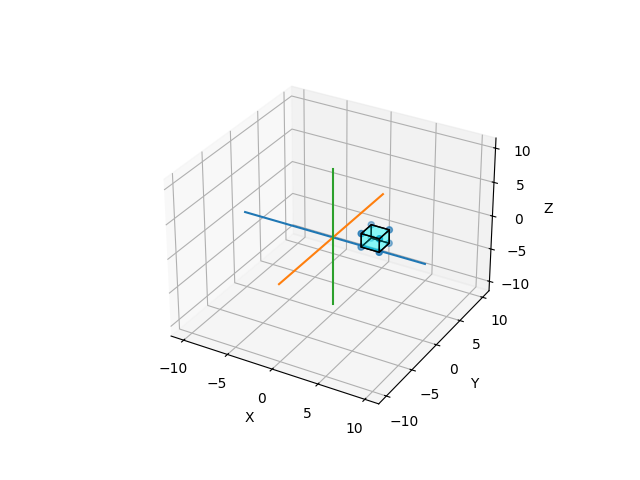

In [50]:
cube = Cube([2, 2, -2], 2)
cube.plot3d()

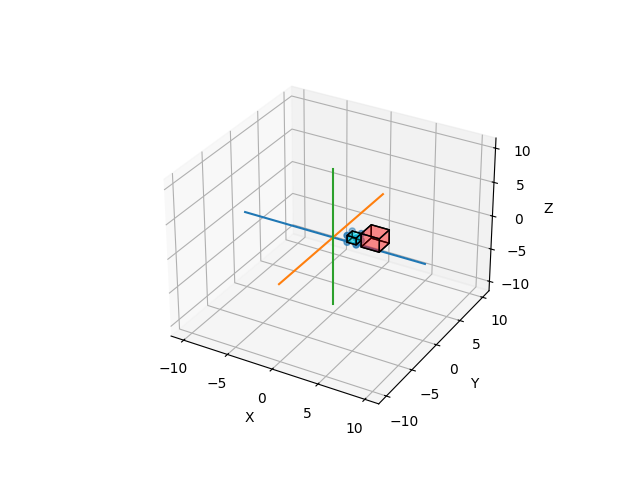

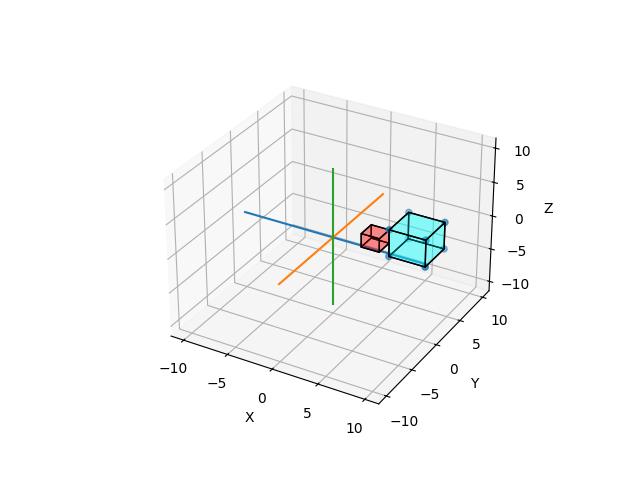

In [51]:
cube_scale_05 = cube.copy()
cube_scale_05.scale(0.5)
cube_scale_05.plot3d(True)

cube_scale_2 = cube.copy()
cube_scale_2.scale(2)
cube_scale_2.plot3d(True)

3. Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат, відносно однієї з координатних площин у тривимірній декартовій системі координат (простір).

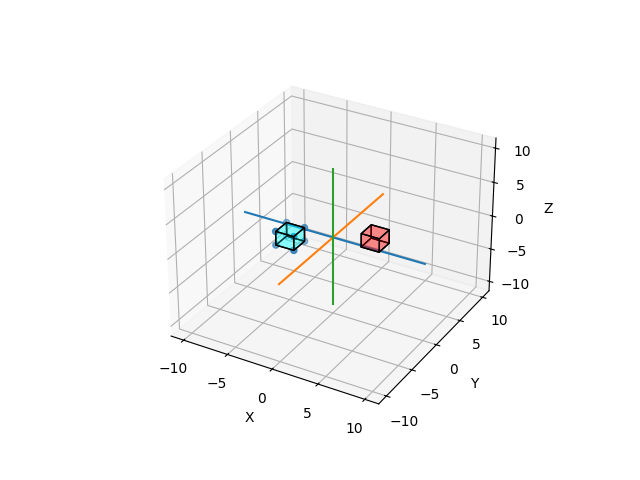

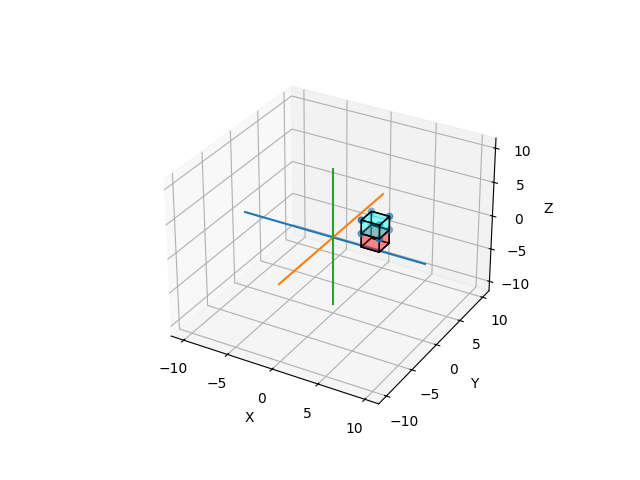

In [52]:
cube_xyz = cube.copy()
cube_xyz.scale([-1, -1, -1])
cube_xyz.plot3d(True)

cube_z = cube.copy()
cube_z.scale([1, 1, -1])
cube_z.plot3d(True)

4. Задати пряму як у прикладі 1 даної лабораторної роботи. Здійснити поворот куба відносно прямої на деякий кут φ. Вказати перетворення, які необхідні для одержання такого результату.

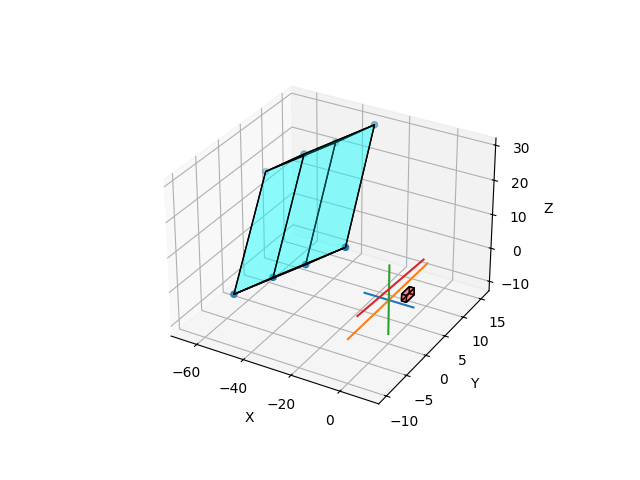

In [54]:
line = Line([1, 2, 3],[2, 1, 3])
line.find_all_matrix()
cube_rotate = cube.copy()
cube_rotate.rotate(line, np.pi)
cube_rotate.plot3d(True, line)

5. Задати площину, як у прикладі 2, здійснити симетрію куба відносно площини, вказати всі математичні перетворення, показати кінцевий результат, який відповідає вимогам задачі. Записати відповідні математичні перетворення.

6. (для студентів, які навчаються на кафедрі ММАД) Запропонувати інший набір перетворень для отримання результатів, які наведені у прикладі 2 даної лабораторної роботи. Тобто здійснити інші перетворення за загальним підходом (симетрія, поворот, перенесення), показати їх математично.

8. (для студентів, які навчаються на кафедрі ММАД) Навести алгоритм з математичними перетвореннями для побудови симетрії відносно площини на основі знань з аналітичної геометрії. Порівняти результати (програмно)

9. До пунктів 2–8 розробити програмне забезпечення (студентам кафедри ММЗІ для пунктів 2–5). Навести результат виконання кожного пункту.

10. (для всіх студентів) Взяти той самий куб, який був поданий у попередніх пунктах. Здійснити ортогональне проектування даного кубу на площину загального виду, яка не паралельна жодній з координатних площин. Вказати відповідні математичні перетворення, розробити відповідне програмне забезпечення.